#**Word Embedding from scratch**

In [18]:
import torch
import torch.nn as nn

from torch.optim import Adam
from torch.distributions.uniform import Uniform
from torch.utils.data import TensorDataset, DataLoader

!pip install lightning
import lightning as L

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
inputs = torch.tensor([[1., 0., 0., 0.],
                       [0., 1., 0., 0.],
                       [0., 0., 1., 0.],
                       [0., 0., 0., 1.]])

labels = torch.tensor([[0., 1., 0., 0.],
                       [0., 0., 1., 0.],
                       [0., 0., 0., 1.],
                       [0., 1., 0., 0.]])

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

In [20]:
class WordEmbeddingScratch(L.LightningModule):

  def __init__(self):
    super().__init__()

    min_value = -0.5
    max_value = 0.5

    self.input1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.input1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.input2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.input2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.input3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.input3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.input4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.input4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

    self.output1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.output1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.output2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.output2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.output3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.output3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.output4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
    self.output4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

    self.loss = nn.CrossEntropyLoss()


  def forward(self, input):
    input = input[0]

    inputs_to_top_hidden = (input[0]*self.input1_w1+
                            input[1]*self.input2_w1+
                            input[2]*self.input3_w1+
                            input[3]*self.input4_w1)

    inputs_to_bottom_hidden = (input[0]*self.input1_w2+
                            input[1]*self.input2_w2+
                            input[2]*self.input3_w2+
                            input[3]*self.input4_w2)

    output1 = (inputs_to_top_hidden*self.output1_w1+
               inputs_to_bottom_hidden*self.output1_w2)
    output2 = (inputs_to_top_hidden*self.output2_w1+
               inputs_to_bottom_hidden*self.output2_w2)
    output3 = (inputs_to_top_hidden*self.output3_w1+
               inputs_to_bottom_hidden*self.output3_w2)
    output4 = (inputs_to_top_hidden*self.output4_w1+
               inputs_to_bottom_hidden*self.output4_w2)

    output_presoftmax = torch.stack([output1, output2, output3, output4])
    return output_presoftmax


  def configure_optimizers(self):
    return Adam(self.parameters(), lr=0.1)

  def training_step(self, batch, batch_idx):

    input_i, label_i = batch
    output_i = self.forward(input_i)
    loss = self.loss(output_i, label_i[0])

    return loss


In [21]:
model = WordEmbeddingScratch()

print("Parameters before optimization: ")
for name, param in model.named_parameters():
  print(name, param.data)

Parameters before optimization: 
input1_w1 tensor(0.0371)
input1_w2 tensor(0.0121)
input2_w1 tensor(-0.0154)
input2_w2 tensor(0.2225)
input3_w1 tensor(-0.2718)
input3_w2 tensor(-0.0497)
input4_w1 tensor(-0.2052)
input4_w2 tensor(0.2786)
output1_w1 tensor(0.2982)
output1_w2 tensor(0.2140)
output2_w1 tensor(0.4897)
output2_w2 tensor(-0.0017)
output3_w1 tensor(0.2252)
output3_w2 tensor(0.1873)
output4_w1 tensor(-0.0497)
output4_w2 tensor(0.2677)


In [22]:
data = {
    "w1" : [model.input1_w1.item(),
            model.input2_w1.item(),
            model.input3_w1.item(),
            model.input4_w1.item(),],

    "w2" : [model.input1_w2.item(),
            model.input2_w2.item(),
            model.input3_w2.item(),
            model.input4_w2.item(),],

    "Token" : ["word 1", "word 2", "word 3", "word 4"],

    "Input" : ["input 1", "input 2", "input 3", "input 4"]
}

df = pd.DataFrame(data)
df

,w1,w2,Token,Input
0,0.037059,0.012121,word 1,input 1
1,-0.015386,0.222484,word 2,input 2
2,-0.271781,-0.049661,word 3,input 3
3,-0.205222,0.278557,word 4,input 4


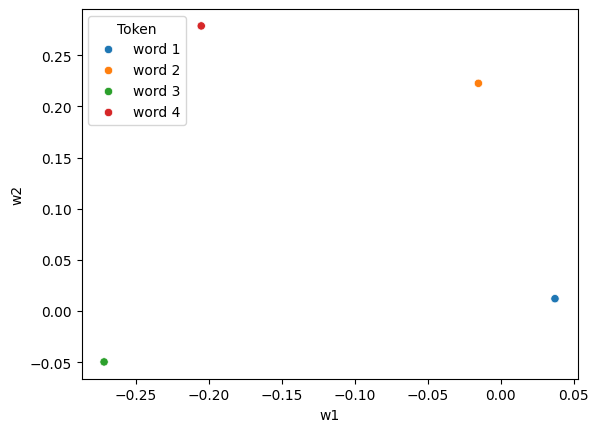

In [23]:
sns.scatterplot(data=df, x="w1", y="w2", hue='Token')
plt.show()

In [24]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(model, train_dataloaders=dataloader)

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | loss         | CrossEntropyLoss | 0      | train


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


In [25]:
data = {
    "w1" : [model.input1_w1.item(),
            model.input2_w1.item(),
            model.input3_w1.item(),
            model.input4_w1.item(),],

    "w2" : [model.input1_w2.item(),
            model.input2_w2.item(),
            model.input3_w2.item(),
            model.input4_w2.item(),],

    "Token" : ["word 1", "word 2", "word 3", "word 4"],

    "Input" : ["input 1", "input 2", "input 3", "input 4"]
}

df = pd.DataFrame(data)
df

,w1,w2,Token,Input
0,2.020967,-1.551748,word 1,input 1
1,-2.256469,2.212588,word 2,input 2
2,-2.069579,-1.973443,word 3,input 3
3,1.783122,-1.733760,word 4,input 4


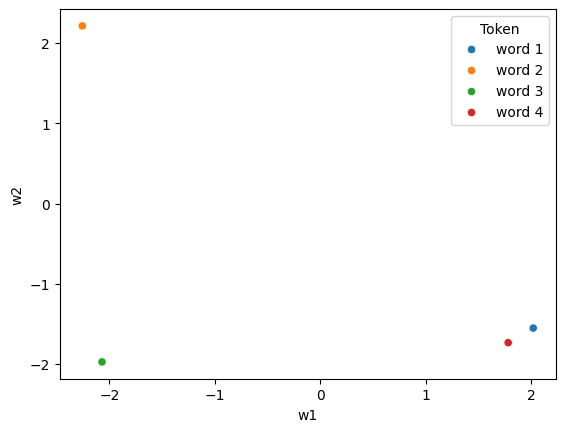

In [26]:
sns.scatterplot(data=df, x="w1", y="w2", hue='Token')
plt.show()

In [28]:
softmax = nn.Softmax(dim=0)

print(torch.round(softmax(model(torch.tensor([[1., 0., 0., 0.,]]))), decimals=2))
print(torch.round(softmax(model(torch.tensor([[0., 1., 0., 0.,]]))), decimals=2))
print(torch.round(softmax(model(torch.tensor([[0., 0., 1., 0.,]]))), decimals=2))
print(torch.round(softmax(model(torch.tensor([[0., 0., 0., 1.,]]))), decimals=2))

tensor([0., 1., 0., 0.], grad_fn=<RoundBackward1>)
tensor([0., 0., 1., 0.], grad_fn=<RoundBackward1>)
tensor([0., 0., 0., 1.], grad_fn=<RoundBackward1>)
tensor([0., 1., 0., 0.], grad_fn=<RoundBackward1>)


#**Word Embedding with Lightning**

In [29]:
class WordEmbeddingLightning(L.LightningModule):
  def __init__(self):
    super().__init__()

    self.input_to_hidden = nn.Linear(4, 2, bias=False)
    self.hidden_to_output = nn.Linear(2, 4, bias=False)

    self.loss = nn.CrossEntropyLoss()

  def forward(self, input):

    hidden = self.input_to_hidden(input)
    output = self.hidden_to_output(hidden)

    return output

  def configure_optimizers(self):
    return Adam(self.parameters(), lr=0.1)


  def training_step(self, batch, batch_idx):

    input_i, label_i = batch
    output_i = self.forward(input_i)
    loss = self.loss(output_i, label_i)

    return loss

In [30]:
model = WordEmbeddingLightning()

data = {
     "w1" : model.input_to_hidden.weight.detach()[0].numpy(),
     "w2" : model.input_to_hidden.weight.detach()[1].numpy(),
     "Token" : ["word 1", "word 2", "word 3", "word 4"],
     "Input" : ["input 1", "input 2", "input 3", "input 4"]
}

df = pd.DataFrame(data)
df

,w1,w2,Token,Input
0,0.084776,-0.012815,word 1,input 1
1,-0.228421,-0.020561,word 2,input 2
2,-0.106893,-0.489167,word 3,input 3
3,-0.089595,-0.329571,word 4,input 4


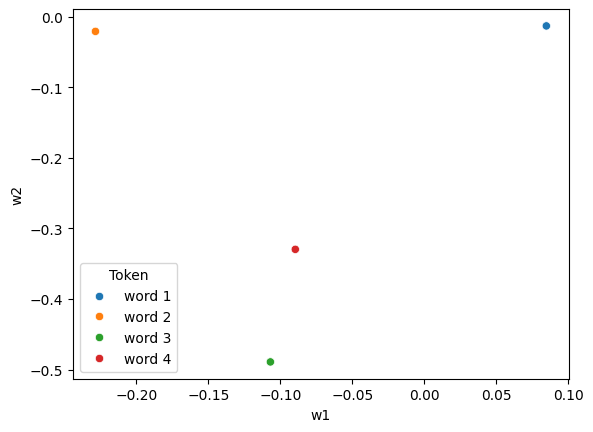

In [31]:
sns.scatterplot(data=df, x="w1", y="w2", hue='Token')
plt.show()

In [32]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(model, train_dataloaders=dataloader)

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | input_to_hidden  | Linear           | 8  

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


In [33]:
data = {
     "w1" : model.input_to_hidden.weight.detach()[0].numpy(),
     "w2" : model.input_to_hidden.weight.detach()[1].numpy(),
     "Token" : ["word 1", "word 2", "word 3", "word 4"],
     "Input" : ["input 1", "input 2", "input 3", "input 4"]
}

df = pd.DataFrame(data)
df

,w1,w2,Token,Input
0,1.663678,-1.632666,word 1,input 1
1,-2.126565,-2.587753,word 2,input 2
2,-2.259036,1.624324,word 3,input 3
3,1.509204,-1.796201,word 4,input 4


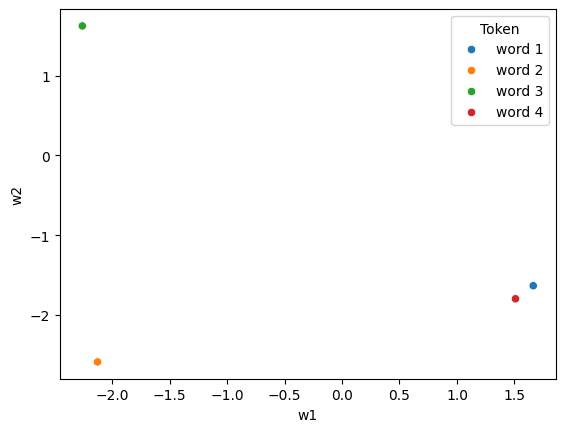

In [34]:
sns.scatterplot(data=df, x="w1", y="w2", hue='Token')
plt.show()